In [48]:
# % pipenv install opencv 

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 1. 直方圖

[[30 30 30 ...  2  3  3]
 [30 30 30 ...  2  3  3]
 [30 30 30 ...  2  3  3]
 ...
 [11 11 12 ...  1  1  1]
 [11 11 11 ...  1  1  1]
 [10 11 11 ...  1  1  1]]


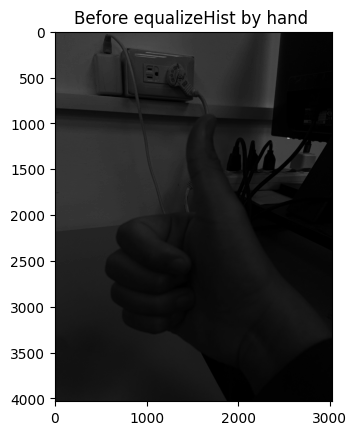

In [50]:
# 載入圖片
image = cv2.imread("hw1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_image)
# 顯示原圖 
plt.figure()
plt.title("Before equalizeHist by hand ")
plt.imshow(gray_image, cmap='gray')
plt.show()

#### 手刻法
1. 轉直方圖
2. PMF
3. CDF
4. CDF normaliztion 

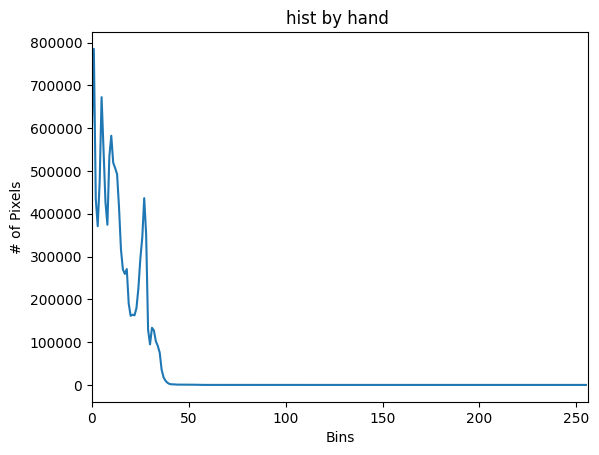

In [51]:
#把二維數據轉成一維直方圖
def calchist(gray_image):
    hist = np.zeros(256) 
    for h in range(gray_image.shape[0]):
        for w in range(gray_image.shape[1]):
            hist[gray_image[h,w]] += 1
    return hist
hist = calchist(gray_image)
# 顯示直方圖
plt.figure() #創建一個圖
plt.title("hist by hand ")
plt.xlabel("Bins") 
plt.ylabel("# of Pixels")
plt.plot(hist) #畫一維陣列的圖
plt.xlim([0, 256])#限制x範圍
plt.show()

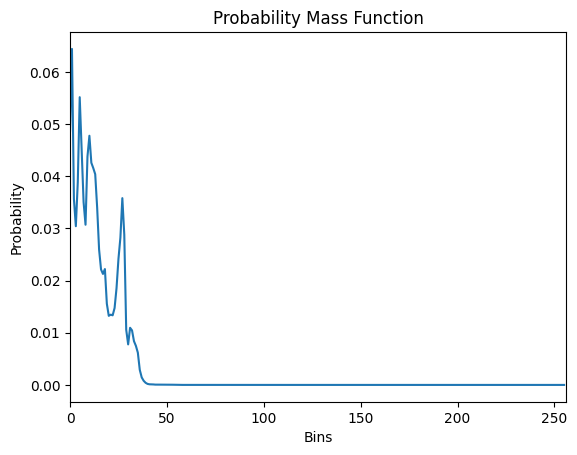

In [52]:
# 計算並顯示概率質量函數（PMF）
pmf = hist / sum(hist)
plt.figure()
plt.title("Probability Mass Function")
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.plot(pmf)
plt.xlim([0, 256])
plt.show()

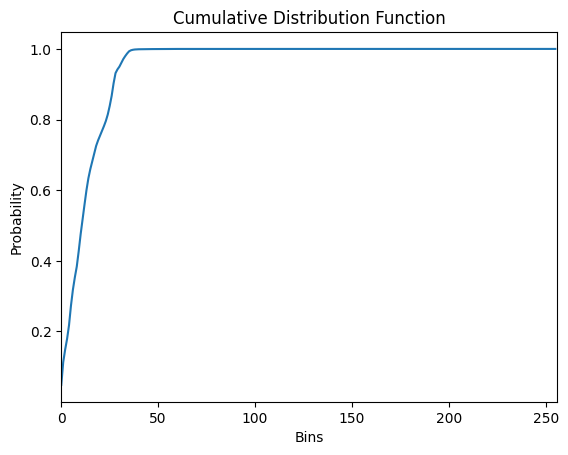

In [53]:
# 計算累積分佈函數
def cumsum(pmf):
    cdf = np.zeros_like(pmf)  # 創建一個與PMF相同大小的零數組，用於存儲CDF的值
    cumulative_sum = 0  
    for i in range(len(pmf)):
        cumulative_sum += pmf[i]
        cdf[i] = cumulative_sum
    return cdf
cdf = cumsum(pmf) 
plt.figure()
plt.title("Cumulative Distribution Function")
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.plot(cdf)
plt.xlim([0, 256])
plt.show()


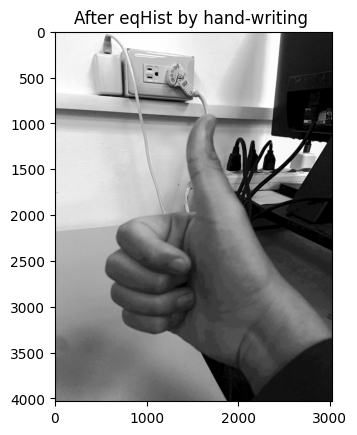

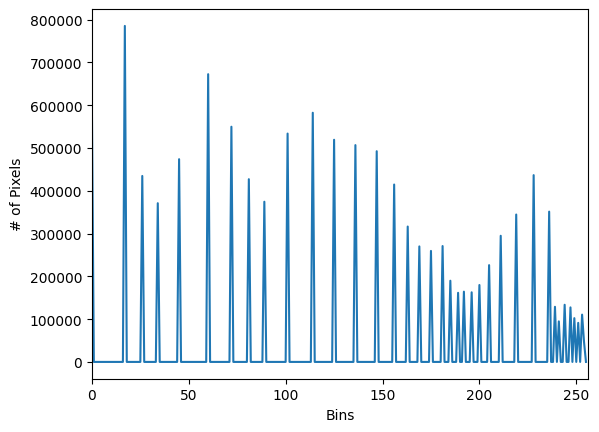

In [56]:
# 換出轉移曲線 cdf[gray_image[height, width]] * (255-0)
# 找到換算的亮度 = 距離差  乘上 放大的比例
# ex: (30% - 1%  ) / (255-0) * (255-0)
# ex: (30% - 1%  ) / (255-0) * (255-0)
# 1. cdf - cdfmin 是指當下機率與最小的機率距離 
# 2.  (255/ (cdf_max - cdf_min) )) 是指這個距離放大的倍數
# 3. pmf 是指該個亮度在整體的佔比
# 4. cdf 是指小於該個亮度在整體的佔比 
# 正規化 CDF
cdf_min = cdf[0]
cdf_max = cdf[-1]
cdf_normalized = (cdf - cdf_min) *  255/ (cdf_max - cdf_min)
new_ = np.zeros_like(gray_image) # 創建一個新的二維陣列儲存圖片轉換結果
height, width = gray_image.shape

for w in range(width):
    for h in range(height):
        # 使用正規化後的 CDF 進行映射
        new_[h, w] = cdf_normalized[gray_image[h, w]]

#顯示圖片結果 
plt.figure()
plt.title("After eqHist by hand-writing ")
plt.imshow(new_, cmap='gray',vmin=0, vmax=255)
plt.show()

# 計算並顯示直方圖
hist = calchist(new_)
plt.figure()
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

#### openCV函數實作直方圖
1. 轉成直方圖 hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
2. 轉成等化後的圖像。eqHist = cv2.equalizeHist(gray_image)

In [1]:
# 顯示原圖片 & 直方圖 
plt.figure()
plt.title("Before equalizeHist by opencv ")
plt.imshow(gray_image, cmap='gray')
plt.show()
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist.flatten()
plt.figure()
plt.title("hist by opencv ")
plt.xlabel("Bins")
plt.ylabel("numbers of piexls ")
plt.plot(hist)
plt.show()

# 轉換成等化直方圖
eqHist = cv2.equalizeHist(gray_image)
# 顯示轉換後 & 直方圖
plt.figure()
plt.title("After equalizeHist by opencv")
plt.imshow(eqHist, cmap='gray')
plt.show()
hist = cv2.calcHist([eqHist], [0], None, [256], [0, 256])
hist.flatten()
# print(hist)
plt.figure()
plt.title("hist by opencv")
plt.xlabel("Bins")
plt.ylabel("numbers of piexls ")
plt.plot(hist)
plt.show()

NameError: name 'plt' is not defined

#### 3. 加入胡椒鹽雜訊 (30%)
加入胡椒鹽雜訊 評分標準
需要顯示原圖以及加入胡椒鹽雜訊後的圖
* 完整完成功能(80分)
* 完整完成功能且註解詳細清楚(或者demo時說明清楚)(100)

In [25]:
img = cv2.imread('hw1.jpeg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def show_img(img,title,xlabel,ylabel):
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def add_salt_and_pepper(outputimg,fraction_salt:float,fraction_pepper:float):
    '''
    img:輸入的灰階圖像
    fraction_salt:鹽的比例255
    fraction_pepper:胡椒的比例0
    return: 新的圖像
    '''
    row , col = img.shape[0:2]
    num_salt = int(np.ceil(fraction_salt * img.size ))
    num_pepper = int(np.ceil(fraction_pepper * img.size ))
    output = img.copy()
    for i in range(num_salt):
        x , y = np.random.randint(0, col),np.random.randint(0, row)
        output[y,x] = 255
    
    for i in range(num_pepper):
        x , y = np.random.randint(0, col),np.random.randint(0, row)
        output[y,x] = 0 
    return output        
new = add_salt_and_pepper(gray_image,0.1,0.1)
show_img(new,title="add salt and pepper",xlabel="width",ylabel="height")